**PCCP Capstone project Cohort 38**

#### Team Members: Muhammad Afiq Bin Aini, Daniel Khong Mun Loong, Tham Mun Yang

#### <u>Section 1: Data Exploration</u>

*We will extract the raw data from the original raw csv file for e commerce and perform initial checks and analysis to understand the nature, integrity, scope, variety of data*

In [1]:
# module imports
# visualization
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import datetime as dt
import calendar

# Setting plot style
sns.set(style='darkgrid', palette='colorblind', font='serif', font_scale=1)

# create dataframe from csv data
df_ = pd.read_csv('ecommerce.csv', encoding='unicode_escape')

# create copy of dataframe
df = df_.copy()

# get shape of dataframe
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (541909, 8)


In [2]:
# get column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<p><font color='blue'>
The dataset consists of 541,909 entries across 8 columns. 
Below is a detailed overview of each column:

|#|Column|Remarks|
|:-|:-|:-|
|1|InvoiceNo|Contains the invoice number for each transaction, where each number can represent multiple items purchased in a single transaction.|
|2|StockCode|Product code for each item in the inventory|
|3|Description|Product descriptive name.<br>*Some missing data - with 540,455 non-null values (99.73% complete)*|    
|4|Quantity|Indicates the number of products purchased in each transaction.|
|5|InvoiceDate|Date and time when the purchase transaction occurred.|
|6|UnitPrice|The price of a single item|    
|7|CustomerID|A unique identifier assigned to each customer. <br>*Significant missing data - with only 406,829 non-null entries (75.07% complete)*|
|8|Country|The country of residence for the customer.|


<u>**Observations:**</u>

1. To address missing values in the Description and CustomerID columns
2. The InvoiceDate column should be converted into datetime format, which will facilitate further time series analysis.
3. Noted that a single customer can have multiple transactions
</font><p>

<b>
================</br>
Basic Summary Stats
</b>

In [3]:
# descriptive statistics for numerical features
print(df.describe())

# incl categorical data
df.describe(include='all').T

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


count unique                                 top    freq  \
InvoiceNo      541909  25900                              573585    1114   
StockCode      541909   4070                              85123A    2313   
Description    540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369   
Quantity     541909.0    NaN                                 NaN     NaN   
InvoiceDate    541909  23260                    10/31/2011 14:41    1114   
UnitPrice    541909.0    NaN                                 NaN     NaN   
CustomerID   406829.0    NaN                                 NaN     NaN   
Country        541909     38                      United Kingdom  495478   

                    mean          std       min      25%      50%      75%  \
InvoiceNo            NaN          NaN       NaN      NaN      NaN      NaN   
StockCode            NaN          NaN       NaN      NaN      NaN      NaN   
Description          NaN          NaN       NaN      NaN      NaN      NaN   
Quantity         9.55225   218.081158  -80995.0      1.0      3.0     10.0   
InvoiceDate          NaN          NaN       NaN      NaN      NaN      NaN   
UnitPrice       4.611114    96.759853 -11062.06     1.25     2.08     4.13   
CustomerID   15287.69057  1713.600303   12346.0  13953.0  15152.0  16791.0   
Country              NaN          NaN       NaN      NaN      NaN      NaN   

                 max  
InvoiceNo        NaN  
StockCode        NaN  
Description      NaN  
Quantity     80995.0  
InvoiceDate      NaN  
UnitPrice    38970.0  
CustomerID   18287.0  
Country          NaN

<font color='blue'>
<u><b>Observations:</b></u>

**1. Quantity:**
- Average quantity of products in a transaction is approximately 9.55.
- The negative values suggest returned or cancelled orders (which needs to be addressed)
- 25% of the Quantity values are at or below 1, and 75% are at or below 10, meaning that most transactions involve small quantities.

**2. UnitPrice:**

- Average unit price of the products is approximately 4.61.
- The min. unit price include negative values, which needs to be addressed (as negative prices don't make sense)
- Most products are relatively inexpensive as 25% of the UnitPrice values are at or below 1.25, and 75% are at or below 4.13


**3. CustomerID:**
-  There are 406,829 non-null entries, indicating missing values in the dataset (which needs to be addressed)


**4. InvoiceNo:**
- There are 25,900 unique invoice numbers, indicating 25,900 separate transactions.


**5. StockCode:**
- There are 4,070 unique stock codes representing different products.

**8. Description:**
- There are 4,223 unique product descriptions. Despite this, there are 4,070 unique stocks, indicating multiple descriptions for the same StockCode.
- There are some missing values in this column which need to be treated.

**7. Country:**
- The transactions come from 38 different countries, with a majority originating from United Kingdom.
</font>

---

#### <u>Section 2: Data Preparation</u>

*Our workflow is to cleanup the data and save a snapshot of the cleaned dataframe to another csv file. The preliminary Data exploration begins after data clean up to help in developing insights to our hypothesis. Finally, we will perform basic data visualization on the preliminary data exploration working dataframes.*

Please see the below subsections for preparation flow done

<b>
================</br>
Section 2A: cleanup 
</b>

#### 1. Treat NaN or None values for  CustomerID and Description - to be dropped

In [4]:
# calculate % of null values for each column
null_percentage = df.isnull().mean() * 100
null_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

<font color="blue">
CustomerID column contains nearly 1/4 of missing data (24.93%)
<br/><br/>
Since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing CustomerIDs seems to be the most reasonable approach to maintain the integrity of the clusters and further analysis.

In addition, removing rows with missing values in the CustomerID will also remove the rows with the missing values in the Description column.</font>

In [5]:
# remove rows with missing values in 'CustomerID' column
df = df.dropna(subset=["CustomerID"])

# verify removal of missing values
null_percentage = df.isnull().mean() * 100
null_percentage

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [6]:
df.shape

(406829, 8)

<b>
================</br>
2. Treat Duplicates - to be dropped</br>
</b>

<font color='blue'>Check dataset for completely identical rows - incl. identical transaction time.  These might be data recording errors rather than genuine repeated transactions. Keeping duplicate rows risk potential inaccuracies & removing them will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors.</font>

In [7]:
# chk for duplicate rows
duplicates = df.duplicated()
df[duplicates]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
527     12/1/2010 11:45       2.10     17908.0  United Kingdom  
537     12/1/2010 11:45       2.95     17908.0  United Kingdom  
539     12/1/2010 11:45       4.95     17908.0  United Kingdom  
555     12/1/2010 11:49       2.95     17920.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[5225 rows x 8 columns]

In [8]:
# remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.shape

(401604, 8)

<b>
================</br>
3. Treat Cancelled Orders - </br>
</b>

<font color='blue'>"Quantity" column contains negative values where such entries correlate with InvoiceNo starting with the letter 'C'.
<br/>Assumption is made that these negative numbers indicate returned items or cancelled orders</font>

In [9]:
df[df["Quantity"] < 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
401159   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
401243   C581499         M                            Manual        -1   
401410   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
401411   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
401412   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
401159   12/9/2011 9:57       0.83     14397.0  United Kingdom  
401243  12/9/2011 10:28     224.69     15498.0  United Kingdom  
401410  12/9/2011 11:57      10.95     15311.0  United Kingdom  
401411  12/9/2011 11:58       1.25     17315.0  United Kingdom  
401412  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [10]:
df["is_Cancelled"] = df["InvoiceNo"].apply(lambda x: True if x.startswith('C') else False)
df["is_Cancelled"].value_counts(normalize=True)

is_Cancelled
False    0.977909
True     0.022091
Name: proportion, dtype: float64

<font color ='blue'>The percentage of cancelled transactions in the dataset is: 2.21%

In [11]:
df[df["is_Cancelled"]].describe().drop('CustomerID', axis=1).T

count       mean          std       min   25%   50%   75%      max
Quantity   8872.0 -30.774910  1172.249902 -80995.00 -6.00 -2.00 -1.00     -1.0
UnitPrice  8872.0  18.899512   445.190864      0.01  1.45  2.95  4.95  38970.0

<font color='blue'>
<u><b>Observations:</b></u>

- All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.
- The UnitPrice column has a considerable spread, showing that a variety of products, from low to high value, were part of the cancelled transactions. <br/>**!!** Note that when deriving revenue, cancelled orders should be excluded.

<b>
================</br>
4. Treat StockCode - to be dropped</br>
</b>
<font color='blue'>
There are records with perculiar stock codes. Since the aim is to cluster customers based on their product purchasing behaviors, such records should be excluded from the dataset. The focus then remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

In [12]:
df["StockCode"].nunique()

3684

In [13]:
df["len_StockCode"] = df["StockCode"].str.strip().str.len()
df["len_StockCode"].value_counts(normalize=True)

len_StockCode
5     0.911791
6     0.082703
4     0.003028
1     0.001337
7     0.000737
2     0.000334
3     0.000040
12    0.000030
Name: proportion, dtype: float64

<font color='blue'>A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.

In [14]:
df[df["len_StockCode"] == 5]["StockCode"].nunique()

2798

In [15]:
df["len_StockCode"] = df["StockCode"].str.strip().str.len()

In [16]:
df[df["len_StockCode"] < 5]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
45        536370      POST     POSTAGE         3   12/1/2010 8:45      18.00   
141      C536379         D    Discount        -1   12/1/2010 9:41      27.50   
386       536403      POST     POSTAGE         1  12/1/2010 11:27      15.00   
1097      536527      POST     POSTAGE         1  12/1/2010 13:04      18.00   
1386      536540        C2    CARRIAGE         1  12/1/2010 14:05      50.00   
...          ...       ...         ...       ...              ...        ...   
401195    581494      POST     POSTAGE         2  12/9/2011 10:13      18.00   
401243   C581499         M      Manual        -1  12/9/2011 10:28     224.69   
401425    581570      POST     POSTAGE         1  12/9/2011 11:59      18.00   
401462    581574      POST     POSTAGE         2  12/9/2011 12:09      18.00   
401463    581578      POST     POSTAGE         3  12/9/2011 12:16      18.00   

        CustomerID         Country  is_Cancelled  len_StockCode  
45         12583.0          France         False              4  
141        14527.0  United Kingdom          True              1  
386        12791.0     Netherlands         False              4  
1097       12662.0         Germany         False              4  
1386       14911.0            EIRE         False              2  
...            ...             ...           ...            ...  
401195     12518.0         Germany         False              4  
401243     15498.0  United Kingdom          True              1  
401425     12662.0         Germany         False              4  
401462     12526.0         Germany         False              4  
401463     12713.0         Germany         False              4  

[1903 rows x 10 columns]

<font color='blue'>Below highlights 7 stock codes that contain no numeric characters, and 1 stock code that contains only 1 numeric character.

In [17]:
df[df["len_StockCode"] < 5]["StockCode"].value_counts(normalize=True)

StockCode
POST    0.628481
M       0.241724
C2      0.070415
D       0.040462
DOT     0.008408
CRUK    0.008408
PADS    0.002102
Name: proportion, dtype: float64

In [18]:
df[df["len_StockCode"] > 7]["StockCode"].value_counts(normalize=True)

StockCode
BANK CHARGES    1.0
Name: proportion, dtype: float64

<font color='blue'>These codes seem to represent non-product transactions like "BANK CHARGES", "POST" (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.

In [19]:
df[(df["len_StockCode"] >= 5) & (df["len_StockCode"] < 8)]["StockCode"].nunique()

3676

In [20]:
df.shape

(401604, 10)

In [21]:
df[(df["len_StockCode"] >= 5) & (df["len_StockCode"] < 8)].shape

(399689, 10)

In [22]:
# calculate the percentage of records with these anomalous stock codes:
percentage_anomalous = ((401604-399689)/401604) * 100
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [23]:
df = df[
    (df["len_StockCode"] >= 5) & (df["len_StockCode"] < 8)
]

In [24]:
df.shape

(399689, 10)

<b>
================</br>
5. Treat Unit Prices</br>
</b>
<font color='blue'>The minimum unit price value is zero. This suggests that there are some transactions where the unit price is zero, potentially indicating a free item or a data entry error. 

In [25]:
df["is_Cancelled"].value_counts()

is_Cancelled
False    391183
True       8506
Name: count, dtype: int64

In [26]:
df.shape

(399689, 10)

In [27]:
df["UnitPrice"].describe()

count    399689.000000
mean          2.907457
std           4.451881
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [28]:
df[df["UnitPrice"]==0].describe()[["Quantity"]]

Quantity
count     33.000000
mean     420.515152
std     2176.713608
min        1.000000
25%        2.000000
50%       11.000000
75%       36.000000
max    12540.000000

In [29]:
df[df["UnitPrice"]==0]

InvoiceNo StockCode                          Description  Quantity  \
6842      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
22619     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
25551     539722     22423             REGENCY CAKESTAND 3 TIER        10   
29374     540372     22090              PAPER BUNTING RETROSPOT        24   
29376     540372     22553               PLASTERS IN TIN SKULLS        24   
34903     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
54482     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
86760     547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
93947     548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
98634     548871     22162          HEART GARLAND RUSTIC PADDED         2   
108583    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
130286    553000     47566                        PARTY BUNTING         4   
138864    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
197297    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
199859    561669     22960             JAM MAKING SET WITH JARS        11   
211834    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
226959    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
226960    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
226961    564651     22955             36 FOIL STAR CAKE CASES        144   
226962    564651     21786                   POLKADOT RAIN HAT        144   
277443    569716     22778                   GLASS CLOCHE SMALL         2   
311019    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
323837    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
324002    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
326232    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
332277    574879     22625                   RED KITCHEN SCALES         2   
332897    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
332898    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
338170    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
338171    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
356571    577129     22464          HANGING METAL HEART LANTERN         4   
358000    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
374208    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

             InvoiceDate  UnitPrice  CustomerID         Country  is_Cancelled  \
6842     12/5/2010 14:02        0.0     12647.0         Germany         False   
22619   12/16/2010 14:36        0.0     16560.0  United Kingdom         False   
25551   12/21/2010 13:45        0.0     14911.0            EIRE         False   
29374     1/6/2011 16:41        0.0     13081.0  United Kingdom         False   
29376     1/6/2011 16:41        0.0     13081.0  United Kingdom         False   
34903    1/13/2011 15:10        0.0     15107.0  United Kingdom         False   
54482    2/10/2011 13:08        0.0     17560.0  United Kingdom         False   
86760    3/23/2011 10:25        0.0     13239.0  United Kingdom         False   
93947    3/30/2011 12:45        0.0     13113.0  United Kingdom         False   
98634     4/4/2011 14:42        0.0     14410.0  United Kingdom         False   
108583   4/14/2011 18:57        0.0     12457.0     Switzerland         False   
130286   5/12/2011 15:21        0.0     17667.0  United Kingdom         False   
138864   5/20/2011 14:13        0.0     12415.0       Australia         False   
197297   7/26/2011 12:24        0.0     16818.0  United Kingdom         False   
199859   7/28/2011 17:09        0.0     12507.0           Spain         False   
211834   8/11/2011 11:42        0.0     14911.0            EIRE         False   
226959   8/

In [30]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df["UnitPrice"] > 0]

In [31]:
df.shape

(399656, 10)

<b>
================</br>
format column #4 InvoiceDate to datetime</br>
</b>

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399656 entries, 0 to 401603
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      399656 non-null  object 
 1   StockCode      399656 non-null  object 
 2   Description    399656 non-null  object 
 3   Quantity       399656 non-null  int64  
 4   InvoiceDate    399656 non-null  object 
 5   UnitPrice      399656 non-null  float64
 6   CustomerID     399656 non-null  float64
 7   Country        399656 non-null  object 
 8   is_Cancelled   399656 non-null  bool   
 9   len_StockCode  399656 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 30.9+ MB


In [33]:
# format InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].astype(str))

# create 'date', 'month', 'week', and 'time' columns
df['date'] = df['InvoiceDate'].dt.strftime('%m/%d/%Y')
df['month'] = df['InvoiceDate'].dt.strftime('%B')
df['week'] = df['InvoiceDate'].dt.strftime('%A')
df['time'] = df['InvoiceDate'].dt.strftime('%H')

   *<font color='blue'>^ Reflect changes - rerun df.info()</font>*

In [34]:
# get the first 5 rows of dataframe df.
display(df.head())
display(df.sample(5))

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  is_Cancelled  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         False   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         False   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         False   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         False   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         False   

   len_StockCode        date     month       week time  
0              6  12/01/2010  December  Wednesday   08  
1              5  12/01/2010  December  Wednesday   08  
2              6  12/01/2010  December  Wednesday   08  
3              6  12/01/2010  December  Wednesday   08  
4              6  12/01/2010  December  Wednesday   08

InvoiceNo StockCode                   Description  Quantity  \
250041    567184     23159  SET OF 5 PANCAKE DAY MAGNETS         2   
225728    564484     20685         DOORMAT RED RETROSPOT         1   
338874    575607    51014L        FEATHER PEN,LIGHT PINK         3   
114730    550919     23201            JUMBO BAG ALPHABET        10   
387650    580295     22308          TEA COSY BLUE STRIPE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  \
250041 2011-09-18 15:41:00       2.08     16033.0  United Kingdom   
225728 2011-08-25 13:46:00       7.95     13634.0  United Kingdom   
338874 2011-11-10 12:37:00       0.83     14096.0  United Kingdom   
114730 2011-04-21 14:06:00       1.95     14735.0  United Kingdom   
387650 2011-12-02 13:49:00       2.55     17841.0  United Kingdom   

        is_Cancelled  len_StockCode        date      month      week time  
250041         False              5  09/18/2011  September    Sunday   15  
225728         False              5  08/25/2011     August  Thursday   13  
338874         False              6  11/10/2011   November  Thursday   12  
114730         False              5  04/21/2011      April  Thursday   14  
387650         False              5  12/02/2011   December    Friday   13

<b>
================</br>
Add Col Revenue
</b>

In [35]:
# Calculate the revenue (if not already done)
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Set revenue to 0 where quantity is negative
df.loc[df['Quantity'] < 0, 'Revenue'] = 0

# Verify the changes
df[df["Quantity"] < 0]

InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
401158   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
401159   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
401410   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
401411   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
401412   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  \
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom   
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom   
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
238    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
...                    ...        ...         ...             ...   
401158 2011-12-09 09:57:00       1.95     14397.0  United Kingdom   
401159 2011-12-09 09:57:00       0.83     14397.0  United Kingdom   
401410 2011-12-09 11:57:00      10.95     15311.0  United Kingdom   
401411 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   
401412 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   

        is_Cancelled  len_StockCode        date     month       week time  \
154             True              6  12/01/2010  December  Wednesday   09   
235             True              5  12/01/2010  December  Wednesday   10   
236             True              5  12/01/2010  December  Wednesday   10   
237             True              5  12/01/2010  December  Wednesday   10   
238             True              5  12/01/2010  December  Wednesday   10   
...              ...            ...         ...       ...        ...  ...   
401158          True              5  12/09/2011  December     Friday   09   
401159          True              5  12/09/2011  December     Friday   09   
401410          True              5  12/09/2011  December     Friday   11   
401411          True              5  12/09/2011  December     Friday   11   
401412          True              5  12/09/2011  December     Friday   11   

        Revenue  
154         0.0  
235         0.0  
236         0.0  
237         0.0  
238         0.0  
...         ...  
401158      0.0  
401159      0.0  
401410      0.0  
401411      0.0  
401412      0.0  

[8506 rows x 15 columns]

<b>
================</br>
Up to this point, the data has been cleaned up and we would briefly review the data and save the cleaned up data into another csv for backup
</b>

In [36]:
# A brief glance into the cleaned up dataframe
display(df.sample(5))
df.shape

InvoiceNo StockCode                     Description  Quantity  \
152907    555835     20840    FRENCH FLORAL CUSHION COVER         18   
6612      537176     22556  PLASTERS IN TIN CIRCUS PARADE          3   
332575    574896     23398           HANGING HEART BONHEUR         4   
324669    574280     23084              RABBIT NIGHT LIGHT        72   
315440    573326     20723        STRAWBERRY CHARLOTTE BAG        10   

               InvoiceDate  UnitPrice  CustomerID         Country  \
152907 2011-06-07 12:34:00       0.85     14525.0  United Kingdom   
6612   2010-12-05 13:26:00       1.65     16411.0  United Kingdom   
332575 2011-11-07 14:51:00       0.85     17014.0  United Kingdom   
324669 2011-11-03 14:47:00       1.79     13408.0  United Kingdom   
315440 2011-10-30 11:08:00       0.85     15298.0  United Kingdom   

        is_Cancelled  len_StockCode        date     month      week time  \
152907         False              5  06/07/2011      June   Tuesday   12   
6612           False              5  12/05/2010  December    Sunday   13   
332575         False              5  11/07/2011  November    Monday   14   
324669         False              5  11/03/2011  November  Thursday   14   
315440         False              5  10/30/2011   October    Sunday   11   

        Revenue  
152907    15.30  
6612       4.95  
332575     3.40  
324669   128.88  
315440     8.50

(399656, 15)

In [37]:
# Save the cleaned up df as a backup for easy retrival of raw cleaned dataframe for modular sections
df.to_csv('ecommerce_clean.csv')


<b>
================================</br>
Section 2B: Preliminary Data exploration begins after data clean up 
</b>


<b>
================</br>
            groupby Stats 
</b>

#### 1. Sales

<font color='blue'>Sales over time - need incorporate Revenue col

In [38]:
# sales trends over time - group data by invoice date (e.g., monthly):
df.set_index('InvoiceDate', inplace=True)
print(df.resample('M')['Revenue'].sum())  # M for monthly

InvoiceDate
2010-12-31     565199.56
2011-01-31     562682.91
2011-02-28     442293.59
2011-03-31     583143.85
2011-04-30     454440.88
2011-05-31     659242.49
2011-06-30     653264.92
2011-07-31     591603.79
2011-08-31     635514.38
2011-09-30     938752.63
2011-10-31    1002326.56
2011-11-30    1136534.00
2011-12-31     512228.08
Freq: M, Name: Revenue, dtype: float64


#### 2. Customer Analysis

<font color='blue'>Sales per cust - need incorporate Revenue col

In [39]:
# sales per cust
# incorporate revenue col
customer_sales = df.groupby('CustomerID')['Revenue'].sum()
print(customer_sales)

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1437.24
12349.0     1457.55
12350.0      294.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2039.58
18287.0     1837.28
Name: Revenue, Length: 4362, dtype: float64


In [40]:
# frequency of purchases
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
print(purchase_frequency)

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4362, dtype: int64


#### 3. Product Analysis

In [41]:
# best selling products

best_sellers = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)
print(best_sellers.head(10))

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
85099B     JUMBO BAG RED RETROSPOT               44963
84879      ASSORTED COLOUR BIRD ORNAMENT         35215
85123A     WHITE HANGING HEART T-LIGHT HOLDER    34128
21212      PACK OF 72 RETROSPOT CAKE CASES       33386
22197      POPCORN HOLDER                        30492
23084      RABBIT NIGHT LIGHT                    27045
22492      MINI PAINT SET VINTAGE                25880
22616      PACK OF 12 LONDON TISSUES             25305
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


In [42]:
# revenue per product
product_revenue = df.groupby(['StockCode', 'Description'])['Revenue'].sum().sort_values(ascending=False)
print(product_revenue.head(10))

StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
22423      REGENCY CAKESTAND 3 TIER              142264.75
85123A     WHITE HANGING HEART T-LIGHT HOLDER    100392.10
85099B     JUMBO BAG RED RETROSPOT                85040.54
23166      MEDIUM CERAMIC TOP STORAGE JAR         81416.73
47566      PARTY BUNTING                          68785.23
84879      ASSORTED COLOUR BIRD ORNAMENT          56413.03
23084      RABBIT NIGHT LIGHT                     51251.24
79321      CHILLI LIGHTS                          46265.11
22086      PAPER CHAIN KIT 50'S CHRISTMAS         42584.13
Name: Revenue, dtype: float64


In [43]:
# Calculate total sales for each product
product_sales = df.groupby('StockCode').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print(product_sales)

           Quantity
StockCode          
84077         53119
22197         48689
85099B        44963
84879         35215
85123A        34185
...             ...
79323W           -8
22034            -9
21144           -12
21645           -24
84347         -1475

[3676 rows x 1 columns]


#### 4. Geographical Insights

In [44]:
# sales by country
sales_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print(sales_by_country)

Country
United Kingdom          7242855.32
Netherlands              283889.34
EIRE                     257013.12
Germany                  205381.15
France                   183801.94
Australia                138103.81
Spain                     55706.56
Switzerland               52441.95
Japan                     37416.37
Belgium                   36927.34
Sweden                    36828.83
Norway                    32454.64
Portugal                  26643.90
Channel Islands           19997.54
Finland                   18344.88
Denmark                   18211.34
Italy                     15820.24
Cyprus                    13167.16
Singapore                  9120.39
Austria                    8742.68
Israel                     7215.84
Poland                     6974.65
Greece                     4425.52
Iceland                    4310.00
USA                        3580.39
Canada                     3115.44
Unspecified                2660.77
Malta                      2070.59
United Arab 

#### * Adv Grouping 


In [45]:
# country level - total rev/invoice/cust
grouped = df.groupby('Country').agg({
    'Revenue': ['sum', 'mean'],
    'InvoiceNo': pd.Series.nunique,
    'CustomerID': pd.Series.nunique
})

print(grouped)

                         Revenue             InvoiceNo CustomerID
                             sum        mean   nunique    nunique
Country                                                          
Australia              138103.81  110.218524        67          9
Austria                  8742.68   22.590904        19         11
Bahrain                   548.40   32.258824         2          2
Belgium                 36927.34   18.735332       117         25
Brazil                   1143.60   35.737500         1          1
Canada                   3115.44   20.769600         5          4
Channel Islands         19997.54   26.592473        31          9
Cyprus                  13167.16   21.656513        17          8
Czech Republic            786.74   28.097857         4          1
Denmark                 18211.34   48.563573        20          9
EIRE                   257013.12   34.882345       311          3
European Community       1159.25   19.987069         4          1
Finland   

<b>
================</br>
Data visualisation
</b>

#### Sales

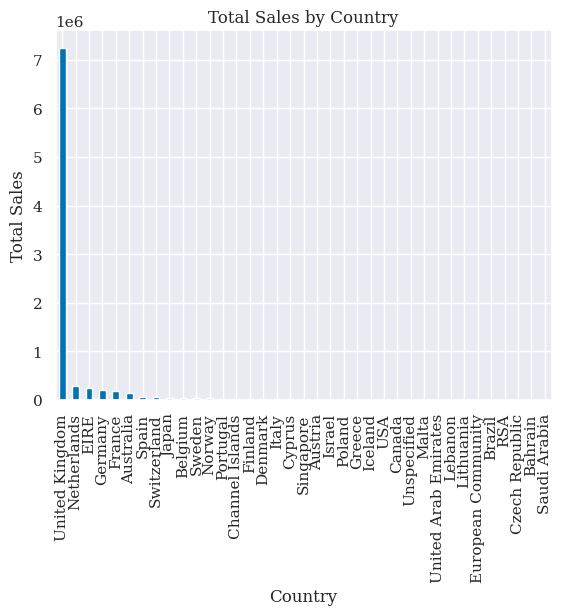

In [46]:
sales_by_country.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

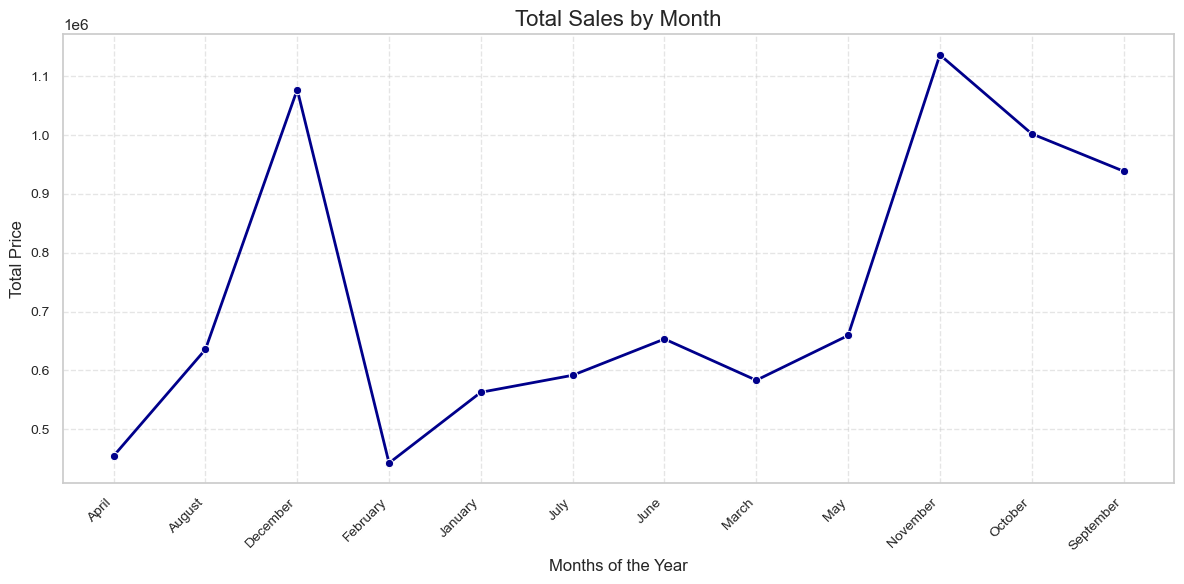

In [47]:
# Calculate the total sales by month
df_months = df.groupby('month').agg({'Revenue': 'sum'}).reset_index()

# Set the style
sns.set_style("whitegrid")

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months, x='month', y='Revenue', marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

#### Country

In [48]:
# Get the top 10 countries with the highest customer base
countries = df['Country'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries",
             labels={'x': 'Country', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

#### Product

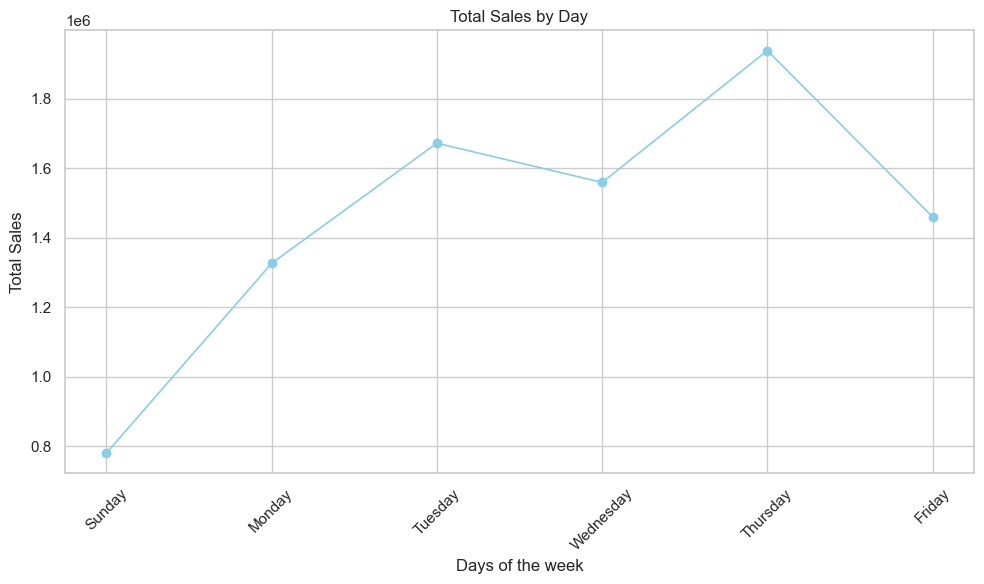

In [49]:
# Assume 'data' is your DataFrame containing 'week' and 'Total_sales' columns

# Calculating total sales on a daily basis
daywise = df.groupby('week').agg({'Revenue': 'sum'}).reset_index()

# Reordering the table according to weekdays
daywise['week'] = pd.Categorical(daywise['week'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
daywise = daywise.sort_values('week')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(daywise['week'], daywise['Revenue'], marker='o', color='skyblue', linewidth=1.2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# Get the top 10 most preferred products
most_preferred_products = df['Description'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products Per Shop",
             labels={'x': 'Product', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

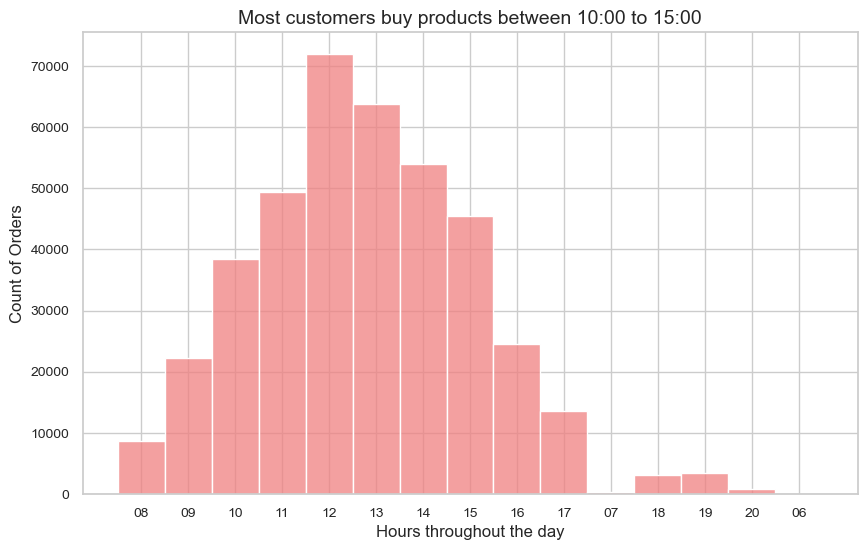

In [51]:
# Set the style
sns.set_style("whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', bins=24, color='lightcoral', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

In [52]:
# using the time segmented data to obtain a pivot table to be used later
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour
pivot_table = df.pivot_table(index='day_of_week', columns='hour_of_day', values='Quantity', aggfunc='sum')

#### <u>Section 3: Hypotheses</u>

1. Hypothesis 1 - Low cost products would generate the most revenue for our business, therefore we should focus our product offering on low cost products.
2. Hypothesis 2 - E-commerce purchasing and transactions are concentrated on the weekends and after-work hours as people return home.
3. Hypothesis 3 - Purchasing transactions increase during specific seasons such as end of year holiday seasons, this pattern is also true for e-commerce. For European countries, Purchasing transactions would peak during the end of year holiday season.

***Hypothesis 1 -***

#### Statement: 
Low cost products would generate the most revenue for our business, therefore we should focus our product offering on low cost products.

#### Analysis: 
To test and visualize the hypothesis, we first analyzed the relationship between the unit price of items and the revenue they generate. This will help in determining whether there is indeed a trend where lower-priced items lead to higher overall revenue.

#### How the plot aims to support or defeat hypothesis
The bar plot shows that the "Low ($0-5)" category contributes significantly more to the total revenue compared to other categories, which supports the hypothesis. Also, the visualization provide insights into the pricing strategy's effectiveness concerning revenue generation.

Further analysis also indicates that the top 5 products are within the "Low ($0-5)" category. To demonstrate seasonal trends, there is a bar plot of the monthly sales volumes for each of the top 5 products.

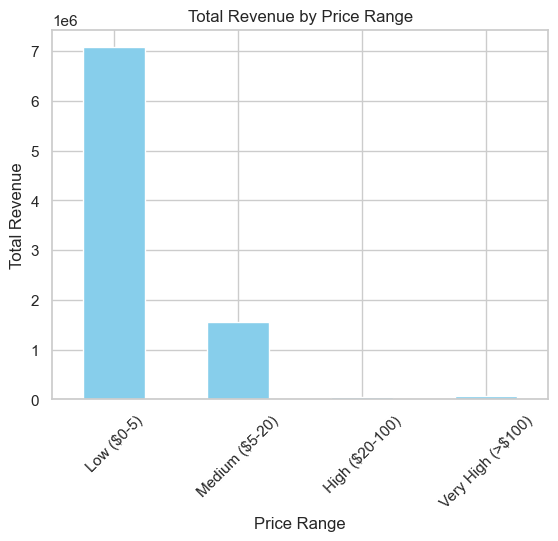

In [53]:
# Define price ranges
bins = [0, 5, 20, 100, float('inf')]
labels = ['Low ($0-5)', 'Medium ($5-20)', 'High ($20-100)', 'Very High (>$100)']
df['PriceRange'] = pd.cut(df['UnitPrice'], bins=bins, labels=labels)

# Group by the new PriceRange column
price_grouped = df.groupby('PriceRange')['Revenue'].sum()

# Plot
price_grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Price Range')
plt.xticks(rotation=45)
plt.show()


In [54]:
# Identify the top 5 products
top_5_products = product_sales.head(5).index.tolist()
display(product_sales.head(5))

Quantity
StockCode          
84077         53119
22197         48689
85099B        44963
84879         35215
85123A        34185

In [55]:
# Filter the dataframe to include only the top 5 products
df_top5 = df[df['StockCode'].isin(top_5_products)]

# Extracting prices and quantities
prices_quantities = df_top5.groupby(['StockCode', 'Description','UnitPrice']).agg({'Quantity': 'sum'}).reset_index()
display(prices_quantities)

StockCode                         Description  UnitPrice  Quantity
0      22197                      POPCORN HOLDER       0.72     22682
1      22197                      POPCORN HOLDER       0.85      7658
2      22197                      POPCORN HOLDER       1.63       152
3      22197                SMALL POPCORN HOLDER       0.72     13194
4      22197                SMALL POPCORN HOLDER       0.85      5003
5      84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS       0.11       -96
6      84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS       0.18      2880
7      84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS       0.21     22944
8      84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS       0.29     27288
9      84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS       0.63       103
10     84879       ASSORTED COLOUR BIRD ORNAMENT       1.45     13256
11     84879       ASSORTED COLOUR BIRD ORNAMENT       1.69     21959
12    85099B             JUMBO BAG RED RETROSPOT       1.65      9105
13    85099B             JUMBO BAG RED RETROSPOT       1.74      1200
14    85099B             JUMBO BAG RED RETROSPOT       1.75       800
15    85099B             JUMBO BAG RED RETROSPOT       1.76        -1
16    85099B             JUMBO BAG RED RETROSPOT       1.79     18526
17    85099B             JUMBO BAG RED RETROSPOT       1.95      3965
18    85099B             JUMBO BAG RED RETROSPOT       2.04       100
19    85099B             JUMBO BAG RED RETROSPOT       2.08     11262
20    85099B             JUMBO BAG RED RETROSPOT       4.13         6
21    85123A  CREAM HANGING HEART T-LIGHT HOLDER       2.55        32
22    85123A  CREAM HANGING HEART T-LIGHT HOLDER       2.95        25
23    85123A  WHITE HANGING HEART T-LIGHT HOLDER       2.40      1930
24    85123A  WHITE HANGING HEART T-LIGHT HOLDER       2.55     17514
25    85123A  WHITE HANGING HEART T-LIGHT HOLDER       2.95     10556
26    85123A  WHITE HANGING HEART T-LIGHT HOLDER       3.20      1888
27    85123A  WHITE HANGING HEART T-LIGHT HOLDER       3.24      2226
28    85123A  WHITE HANGING HEART T-LIGHT HOLDER       5.79        14

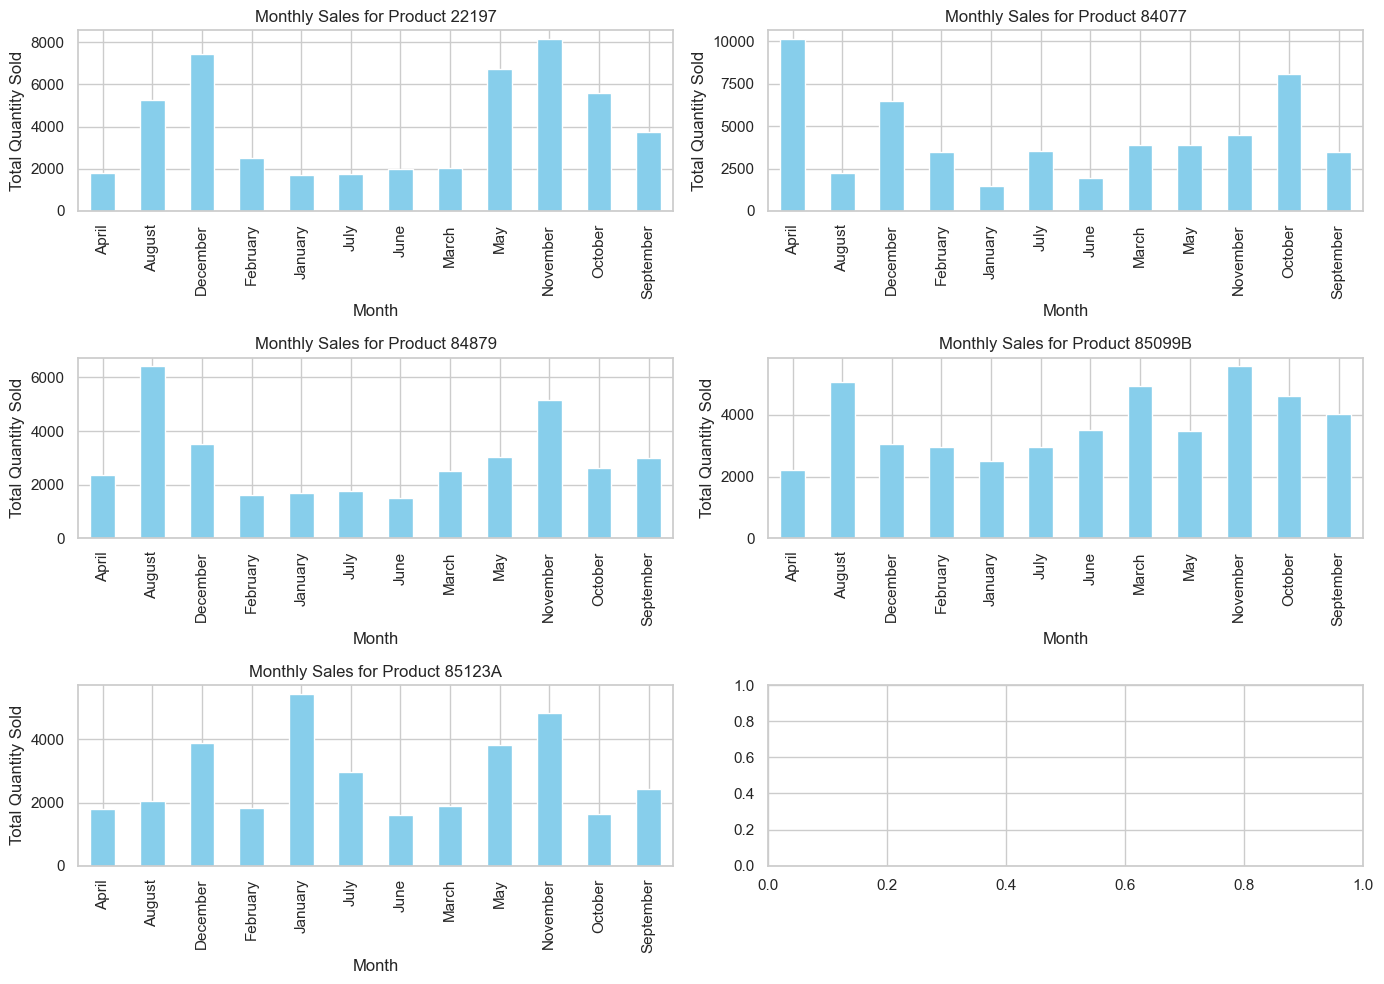

In [56]:
# Group by both StockCode and Month, then sum up Quantities
monthly_sales = df_top5.groupby(['StockCode', 'month']).agg({'Quantity': 'sum'}).unstack(fill_value=0)

# Plot settings
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.ravel()  # flatten the axes array

# Plot each top product's monthly sales
for i, (product, data) in enumerate(monthly_sales.iterrows()):
    ax = axes[i]
    data['Quantity'].plot(kind='bar', ax=ax, color='skyblue', title=f'StockCode: {product}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Quantity Sold')
    ax.set_title(f'Monthly Sales for Product {product}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


***Hypothesis 2 -***

#### Motivation for hypothesis
E-commerce purchasing and transactions are concentrated on the weekends and after-work hours as people return home. The motivation is that buyers would tend to make purchases during their free time and a relaxed state of mind (after-work) provides a more conducive environment for purchasing. 

#### How the plot aims to support or defeat hypothesis
We will plot a heat map of the quantity of purchases each day (x-axis) versus the Hour of the Day (y-axis). If the hypothesis holds true, we will see darker shades on Days 5 and 6 (Saturday and Sunday) after 1700 hours

#### Conclusions
From the plot, we can observe that the hypothesis does not hold true
1. Most purchases are from Monday to Friday, with the highest concentrated on Wednesday and Thursday
2. The heaviest purchasing is between 10am to 3pm
3. Buyers do some purchasing on Sunday but do not purchase on Saturday

***Revisting the time of day transaction frequency graph from above***

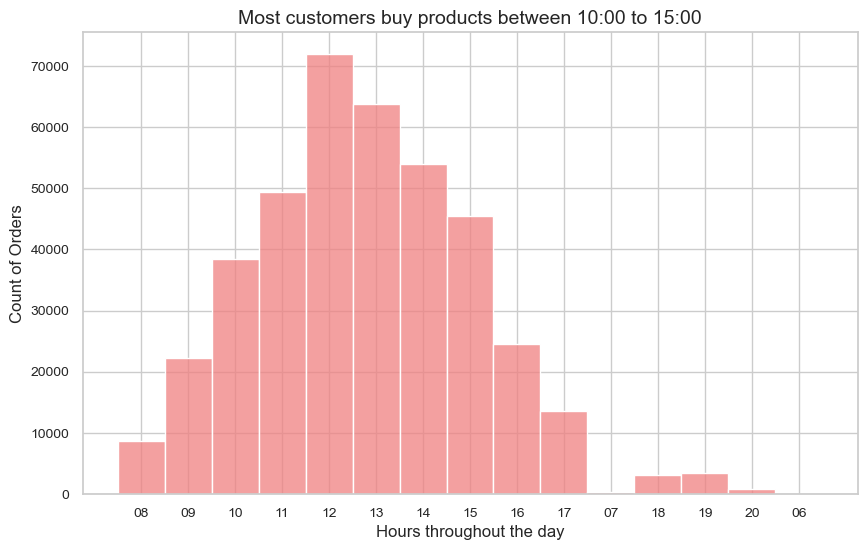

In [57]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', bins=24, color='lightcoral', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

**Further adding an heatmap based on transaction frequency**

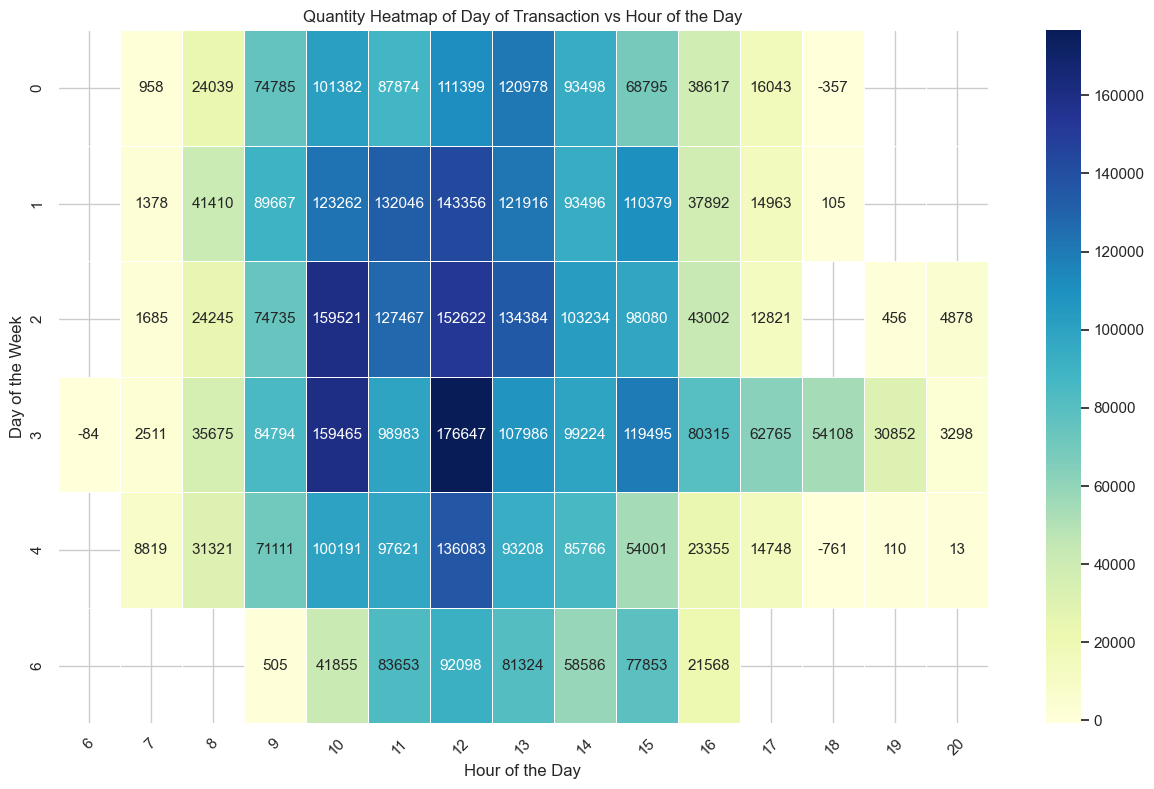

In [58]:
# Plot heatmap of day of transaction vs hour of the day
plt.figure(figsize=(15, 9))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, annot_kws={'size': 11})
plt.title('Quantity Heatmap of Day of Transaction vs Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)


plt.show()

<b>
================</br>
External data augmentation to existing analysis - </br>
</b>

<font color='blue'> We will source an similar e-commerce dataset from another region, Brazil, to compare and evaluate the transaction frequency patterns is similar. Brazilian E-Commerce Public Dataset by Olist. </font>

<font color='red'> Source 1: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/versions/3?resource=download&select=olist_public_dataset_v2_customers.csv </font>

<font color='red'> using olist_classified_public_dataset.csv </font>

In [59]:
## Reading the external datas:
order = pd.read_csv("olist_classified_public_dataset.csv", index_col=0)  ## Unclassified orders dataset

In [60]:
print("Checking the external source dataframe:")
order.head(5)

Checking the external source dataframe:


id order_status  order_products_value  order_freight_value  \
0   1    delivered                 89.99                14.38   
1   2    delivered                 69.00                15.23   
2   3    delivered                 99.80                15.86   
3   4    delivered                 87.00                12.74   
4   5    delivered                 99.90                17.95   

   order_items_qty  order_sellers_qty    order_purchase_timestamp  \
0                1                  1  2017-08-30 11:41:01.000000   
1                1                  1  2017-09-26 09:13:36.000000   
2                2                  4  2018-01-15 15:50:42.000000   
3                1                  1  2018-02-04 11:16:42.000000   
4                1                  2  2017-12-07 11:58:42.000000   

             order_aproved_at order_estimated_delivery_date  \
0  2017-08-30 11:55:08.970352    2017-09-21 00:00:00.000000   
1  2017-09-26 09:28:10.922048    2017-10-24 00:00:00.000000   
2  2018-01-17 07:29:56.419769    2018-02-05 00:00:00.000000   
3  2018-02-06 05:31:50.990164    2018-03-13 00:00:00.000000   
4  2017-12-08 02:36:49.587515    2018-01-03 00:00:00.000000   

  order_delivered_customer_date  ... votes_delayed votes_low_quality  \
0    2017-09-08 20:35:27.276847  ...             0                 0   
1    2017-09-29 21:13:04.984841  ...             0                 0   
2    2018-01-23 17:51:31.134866  ...             0                 0   
3    2018-02-20 19:38:06.633080  ...             3                 0   
4    2017-12-19 22:33:18.952512  ...             0                 0   

   votes_return votes_not_as_anounced  votes_partial_delivery  \
0             0                     0                       0   
1             0                     0                       0   
2             0                     0                       3   
3             0                     0                       0   
4             0                     0                       3   

   votes_other_delivery  votes_other_order  votes_satisfied  \
0                     0                  0                3   
1                     0                  0                0   
2                     0                  0                0   
3                     0                  0                0   
4                     0                  0                0   

   most_voted_subclass       most_voted_class  
0           satisfeito  satisfeito_com_pedido  
1          antes_prazo  satisfeito_com_pedido  
2      entrega_parcial   problemas_de_entrega  
3             atrasado   problemas_de_entrega  
4      entrega_parcial   problemas_de_entrega  

[5 rows x 33 columns]

In [61]:
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'])
order['order_delivered_customer_date']=pd.to_datetime(order['order_delivered_customer_date'])

## Create new columns for date,day,time,month:
order['weekday']=order['order_purchase_timestamp'].dt.day_name
order['year']=order['order_purchase_timestamp'].dt.year
order['monthday']=order['order_purchase_timestamp'].dt.day
order['weekday'] = order['order_purchase_timestamp'].dt.weekday
order['month']=order['order_purchase_timestamp'].dt.month
order['hour']=order['order_purchase_timestamp'].dt.hour

In [62]:
print("Checking the external source dataframe after adding new columns:")
display(order.head(5))
print("Shape of dataframe:", order.shape)

Checking the external source dataframe after adding new columns:


id order_status  order_products_value  order_freight_value  \
0   1    delivered                 89.99                14.38   
1   2    delivered                 69.00                15.23   
2   3    delivered                 99.80                15.86   
3   4    delivered                 87.00                12.74   
4   5    delivered                 99.90                17.95   

   order_items_qty  order_sellers_qty order_purchase_timestamp  \
0                1                  1      2017-08-30 11:41:01   
1                1                  1      2017-09-26 09:13:36   
2                2                  4      2018-01-15 15:50:42   
3                1                  1      2018-02-04 11:16:42   
4                1                  2      2017-12-07 11:58:42   

             order_aproved_at order_estimated_delivery_date  \
0  2017-08-30 11:55:08.970352    2017-09-21 00:00:00.000000   
1  2017-09-26 09:28:10.922048    2017-10-24 00:00:00.000000   
2  2018-01-17 07:29:56.419769    2018-02-05 00:00:00.000000   
3  2018-02-06 05:31:50.990164    2018-03-13 00:00:00.000000   
4  2017-12-08 02:36:49.587515    2018-01-03 00:00:00.000000   

  order_delivered_customer_date  ... votes_other_delivery votes_other_order  \
0    2017-09-08 20:35:27.276847  ...                    0                 0   
1    2017-09-29 21:13:04.984841  ...                    0                 0   
2    2018-01-23 17:51:31.134866  ...                    0                 0   
3    2018-02-20 19:38:06.633080  ...                    0                 0   
4    2017-12-19 22:33:18.952512  ...                    0                 0   

   votes_satisfied most_voted_subclass       most_voted_class  weekday  year  \
0                3          satisfeito  satisfeito_com_pedido        2  2017   
1                0         antes_prazo  satisfeito_com_pedido        1  2017   
2                0     entrega_parcial   problemas_de_entrega        0  2018   
3                0            atrasado   problemas_de_entrega        6  2018   
4                0     entrega_parcial   problemas_de_entrega        3  2017   

   monthday  month hour  
0        30      8   11  
1        26      9    9  
2        15      1   15  
3         4      2   11  
4         7     12   11  

[5 rows x 38 columns]

Shape of dataframe: (3584, 38)


In [63]:
trend_hour=order.groupby('hour').agg({'id':'count'}).rename(columns={'id':'freq_order'}).reset_index()

Text(0.5, 1.0, 'Brazillian e-commerce: Frequency of transaction over the hour')

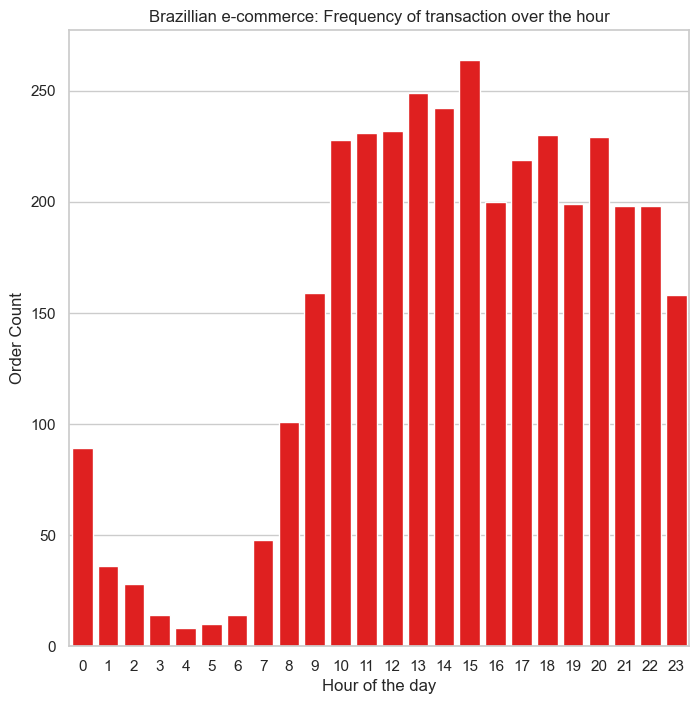

In [64]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x=trend_hour['hour'],y=trend_hour['freq_order'],color="red")
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Order Count')
ax.set_title("Brazillian e-commerce: Frequency of transaction over the hour")

In [65]:
day_hour=order.groupby(['weekday','hour']).agg({'id':'count'}).rename(columns={'id':'freq'}).reset_index()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_hour.weekday=day_hour.weekday.map(weekmap)
day_hour.head()

weekday  hour  freq
0     Mon     0     7
1     Mon     1     3
2     Mon     2     2
3     Mon     3     1
4     Mon     6     1

In [66]:
### Sorting it so that the plot order is correct.
day_hour['weekday']=pd.Categorical(day_hour['weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)

In [67]:
# Creating a pivot table based on the ordered data
pivot_table_new = day_hour.pivot_table(index='weekday', columns='hour', values='freq', aggfunc='sum')
day_hour = pivot_table_new

Text(0.5, 1.0, 'Brazillian e-commerce: Heatmap of tranactions over the hour by day')

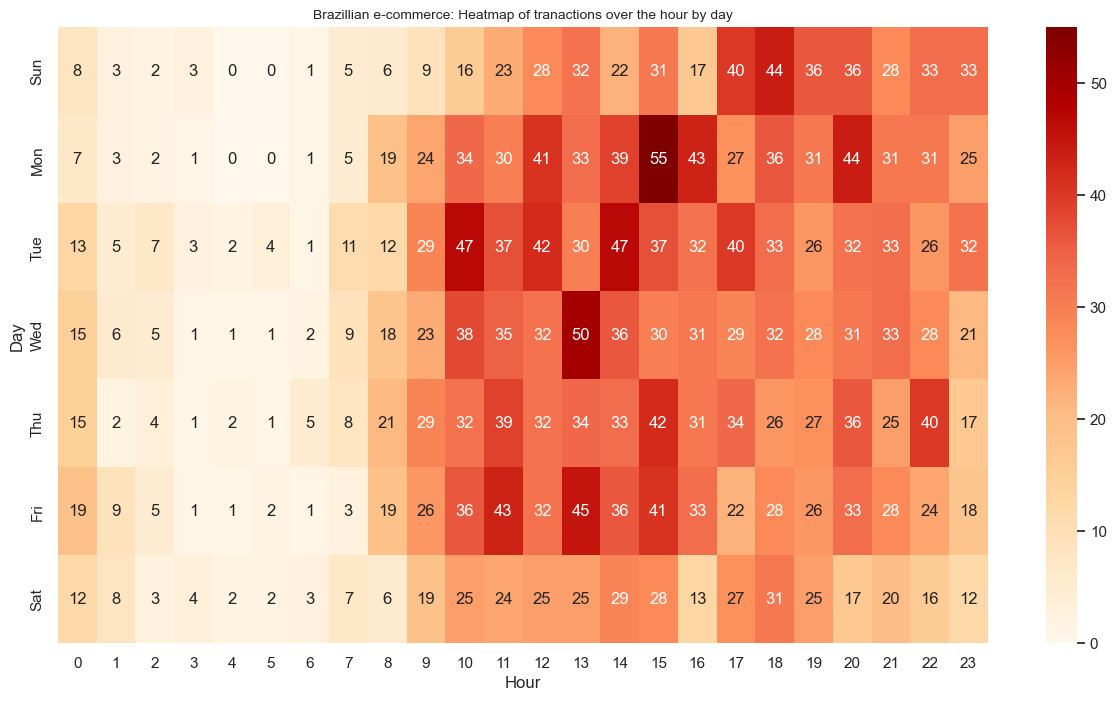

In [68]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(day_hour,annot=True,fmt="d",cmap="OrRd")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Brazillian e-commerce: Heatmap of tranactions over the hour by day",size=10)

***Hypothesis 3 -***

#### Statement
Purchasing transactions increase during specific seasons such as end of year holiday seasons, this pattern is also true for e-commerce. For European countries, Purchasing transactions would peak during the end of year holiday season

#### Motivation for hypothesis
On a macro timescale, in terms of months, our postulation is that e-commerce purchasing transactions will be concentrated on peak periods of end-of-year season similar to traditional retail and commerce. This is a well known fact which we plan to verify if it stands for this current data set.

#### How the plot aims to support or defeat hypothesis
We will plot a collection of histrogram of time axis months vs transaction counts for worldwide, europe and rest of the world to identify the trend. Additionally, to another point of view, we will add top 15 products transactions vs time in months.

#### Conclusions
From the plot, we can observe that the hypothesis does hold true for worldwide and europe
1) Purchase transactions are concentrated around the september to december period which indicates the purchase item nature is similar to retail commercial items which have the same behavior. Europe being the region which celebrate year-end holidays such as christmas adds more strength to what the data appears to suggest.

Conversely, the hypothesis does hold not true for rest of the world,

2) We can see that Purchase transactions are concentrated around July, August and October period. Prehaps, the end-of-year seasonal holidays are not that well celebrated in this region

In [69]:
# create dataframe from backup cleaned up csv data
df_ = pd.read_csv('ecommerce_clean.csv', encoding='unicode_escape', index_col=0)

# create copy of dataframe
df_hyp3 = df_.copy()

# get shape of dataframe
print("Shape of Raw DataFrame:", df.shape)
print("Checking raw df from saved cleaned up data from ecommerce_cleaned:")
df_hyp3.head(5)

Shape of Raw DataFrame: (399656, 17)
Checking raw df from saved cleaned up data from ecommerce_cleaned:


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  is_Cancelled  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom         False   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom         False   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom         False   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom         False   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom         False   

   len_StockCode        date     month       week  time  Revenue  
0              6  12/01/2010  December  Wednesday     8    15.30  
1              5  12/01/2010  December  Wednesday     8    20.34  
2              6  12/01/2010  December  Wednesday     8    22.00  
3              6  12/01/2010  December  Wednesday     8    20.34  
4              6  12/01/2010  December  Wednesday     8    20.34

In [70]:
# data manipulation to add a new column for region of transaction to main df
def check_region(country):
    eu_ls = ['United Kingdom', 'Germany', 'Norway', 'EIRE', 'France', 
             'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 
             'Belgium', 'Lithuania', 'Denmark', 'Cyprus', 'Sweden', 
             'Finland', 'Netherlands', 'Greece', 'Czech Republic', 
             'European Community', 'Malta']
    if country in eu_ls:
        return "Europe"
    else:
        return "Rest of world"

df_hyp3['Region'] = df_hyp3.Country.map(check_region)
print("Checking df with added column for region:")
df_hyp3.sample(10)

Checking df with added column for region:


InvoiceNo StockCode                         Description  Quantity  \
312008    573002     22467                   GUMBALL COAT RACK       288   
220353    563922     23247          BISCUIT TIN 50'S CHRISTMAS         1   
184520    559884     22233         JIGSAW RABBIT AND BIRDHOUSE        12   
365621    578030     84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
257249    567935     20718           RED RETROSPOT SHOPPER BAG        10   
36942     541288    85123A  WHITE HANGING HEART T-LIGHT HOLDER        62   
315146    573311     22852              DOG BOWL VINTAGE CREAM         2   
183557    559751     79321                       CHILLI LIGHTS         2   
16389     538397     22623       BOX OF VINTAGE JIGSAW BLOCKS         20   
177524    558991    17090D     VANILLA INCENSE 40 CONES IN TIN         2   

                InvoiceDate  UnitPrice  CustomerID         Country  \
312008  2011-10-27 12:09:00       2.10     14646.0     Netherlands   
220353  2011-08-21 14:10:00       2.89     14529.0  United Kingdom   
184520  2011-07-13 11:34:00       0.59     16843.0  United Kingdom   
365621  2011-11-22 13:40:00       0.85     15498.0  United Kingdom   
257249  2011-09-22 18:07:00       1.25     13320.0  United Kingdom   
36942   2011-01-17 13:21:00       2.55     14525.0  United Kingdom   
315146  2011-10-28 16:45:00       4.25     14071.0  United Kingdom   
183557  2011-07-12 11:28:00       5.75     14688.0  United Kingdom   
16389   2010-12-12 11:44:00       4.25     12753.0           Japan   
177524  2011-07-05 11:32:00       1.25     14606.0  United Kingdom   

        is_Cancelled  len_StockCode        date      month       week  time  \
312008         False              5  10/27/2011    October   Thursday    12   
220353         False              5  08/21/2011     August     Sunday    14   
184520         False              5  07/13/2011       July  Wednesday    11   
365621         False              5  11/22/2011   November    Tuesday    13   
257249         False              5  09/22/2011  September   Thursday    18   
36942          False              6  01/17/2011    January     Monday    13   
315146         False              5  10/28/2011    October     Friday    16   
183557         False              5  07/12/2011       July    Tuesday    11   
16389          False              5  12/12/2010   December     Sunday    11   
177524         False              6  07/05/2011       July    Tuesday    11   

        Revenue         Region  
312008   604.80         Europe  
220353     2.89         Europe  
184520     7.08         Europe  
365621    20.40         Europe  
257249    12.50         Europe  
36942    158.10         Europe  
315146     8.50         Europe  
183557    11.50         Europe  
16389     85.00  Rest of world  
177524     2.50         Europe

In [71]:
# Extracting filtered df for region
df_euro = df_hyp3[df_hyp3['Region'] == "Europe"]
df_restofw = df_hyp3[df_hyp3['Region'] == "Rest of world"]

print("Checking filtered df for region:")
display(df_euro.sample(5))
display(df_restofw.sample(5))

print("List uniques in column region:", df_euro['Region'].unique())
print("List uniques in column country:", df_euro['Country'].unique())

print("Shape of df_euro:", df_euro.shape)
print("Shape of df_restofw:", df_restofw.shape)

Checking filtered df for region:


InvoiceNo StockCode                     Description  Quantity  \
311293    572911     23355      HOT WATER BOTTLE KEEP CALM         2   
85650     547334     21624     VINTAGE UNION JACK DOORSTOP         4   
123731    552239     23208   LUNCH BAG VINTAGE LEAF DESIGN         6   
280102    569983     23182  TOILET SIGN OCCUPIED OR VACANT         3   
268201    568991     23157      SET OF 6 NATIVITY MAGNETS         12   

                InvoiceDate  UnitPrice  CustomerID         Country  \
311293  2011-10-26 16:03:00       4.95     16345.0  United Kingdom   
85650   2011-03-22 11:43:00       5.95     15044.0  United Kingdom   
123731  2011-05-06 16:54:00       1.65     14056.0  United Kingdom   
280102  2011-10-06 19:49:00       0.83     17231.0  United Kingdom   
268201  2011-09-29 16:44:00       2.08     18204.0  United Kingdom   

        is_Cancelled  len_StockCode        date      month       week  time  \
311293         False              5  10/26/2011    October  Wednesday    16   
85650          False              5  03/22/2011      March    Tuesday    11   
123731         False              5  05/06/2011        May     Friday    16   
280102         False              5  10/06/2011    October   Thursday    19   
268201         False              5  09/29/2011  September   Thursday    16   

        Revenue  Region  
311293     9.90  Europe  
85650     23.80  Europe  
123731     9.90  Europe  
280102     2.49  Europe  
268201    24.96  Europe

InvoiceNo StockCode                        Description  Quantity  \
199749    561658    47559B                TEA TIME OVEN GLOVE         1   
290436    571035     22624               IVORY KITCHEN SCALES         2   
230888    565218     23238  SET OF 4 KNICK KNACK TINS LONDON          6   
10421     537626     22728          ALARM CLOCK BAKELIKE PINK         4   
110362    550344     22533   MAGIC DRAWING SLATE BAKE A CAKE        576   

                InvoiceDate  UnitPrice  CustomerID               Country  \
199749  2011-07-28 16:06:00       1.25     12743.0           Unspecified   
290436  2011-10-13 12:50:00       8.50     12446.0                   RSA   
230888  2011-09-01 17:45:00       4.15     12739.0  United Arab Emirates   
10421   2010-12-07 14:57:00       3.75     12347.0               Iceland   
110362  2011-04-18 09:00:00       0.36     12754.0                 Japan   

        is_Cancelled  len_StockCode        date      month      week  time  \
199749         False              6  07/28/2011       July  Thursday    16   
290436         False              5  10/13/2011    October  Thursday    12   
230888         False              5  09/01/2011  September  Thursday    17   
10421          False              5  12/07/2010   December   Tuesday    14   
110362         False              5  04/18/2011      April    Monday     9   

        Revenue         Region  
199749     1.25  Rest of world  
290436    17.00  Rest of world  
230888    24.90  Rest of world  
10421     15.00  Rest of world  
110362   207.36  Rest of world

List uniques in column region: ['Europe']
List uniques in column country: ['United Kingdom' 'France' 'Netherlands' 'Germany' 'Norway' 'EIRE'
 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium' 'Lithuania'
 'Denmark' 'Cyprus' 'Sweden' 'Finland' 'Greece' 'Czech Republic'
 'European Community' 'Malta']
Shape of df_euro: (395355, 16)
Shape of df_restofw: (4301, 16)


In [72]:
# first, extracting the list of best selling products using groupby and sum together
best_sellers = df_hyp3.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)

best_sell_tp5 = []
best_sell_rank6to10 = []
best_sell_rank11to15 = []
for each_item in best_sellers.index[0:5]:
    code, item_name = each_item
    best_sell_tp5.append(item_name)

for each_item in best_sellers.index[5:10]:
    code, item_name = each_item
    best_sell_rank6to10.append(item_name)    

for each_item in best_sellers.index[10:15]:
    code, item_name = each_item
    best_sell_rank11to15.append(item_name)

print("Groupby best seller:")
display(best_sellers.head(15))
print('The Top 5 product names are:', best_sell_tp5, '\n')
print('The products which are Rank 6 to 10:', best_sell_rank6to10, '\n')
print('The products which are Rank 11 to 15:', best_sell_rank11to15)

def check_product_rank(product_name):
    if product_name in best_sell_tp5:
        return "Top 5"
    elif product_name in best_sell_rank6to10:
        return "Rank 6 to 10"
    elif product_name in best_sell_rank11to15:
        return "Rank 11 to 15"
    else:
        return "Below rank 15"

# data manipulation to add a new column for product ranking to main df
df_hyp3['Sales rank'] = df_hyp3.Description.map(check_product_rank)

# Extracting filtered df for top 15 products
df_rank1to15 = df_hyp3[df_hyp3['Sales rank'] != "Below rank 15"]

Groupby best seller:


StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
85099B     JUMBO BAG RED RETROSPOT               44963
84879      ASSORTED COLOUR BIRD ORNAMENT         35215
85123A     WHITE HANGING HEART T-LIGHT HOLDER    34128
21212      PACK OF 72 RETROSPOT CAKE CASES       33386
22197      POPCORN HOLDER                        30492
23084      RABBIT NIGHT LIGHT                    27045
22492      MINI PAINT SET VINTAGE                25880
22616      PACK OF 12 LONDON TISSUES             25305
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24129
17003      BROCADE RING PURSE                    22924
22178      VICTORIAN GLASS HANGING T-LIGHT       21955
15036      ASSORTED COLOURS SILK FAN             21132
21915      RED  HARMONICA IN BOX                 20882
22386      JUMBO BAG PINK POLKADOT               19692
Name: Quantity, dtype: int64

The Top 5 product names are: ['WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PACK OF 72 RETROSPOT CAKE CASES'] 

The products which are Rank 6 to 10: ['POPCORN HOLDER', 'RABBIT NIGHT LIGHT', 'MINI PAINT SET VINTAGE ', 'PACK OF 12 LONDON TISSUES ', 'PACK OF 60 PINK PAISLEY CAKE CASES'] 

The products which are Rank 11 to 15: ['BROCADE RING PURSE ', 'VICTORIAN GLASS HANGING T-LIGHT', 'ASSORTED COLOURS SILK FAN', 'RED  HARMONICA IN BOX ', 'JUMBO BAG PINK POLKADOT']


In [73]:
# Optional check to confirm filtred dataframe is correct
a_df = df_hyp3.loc[df_hyp3['Sales rank'] == "Top 5"]
b_df = df_hyp3.loc[df_hyp3['Sales rank'] == "Rank 6 to 10"]
c_df = df_hyp3.loc[df_hyp3['Sales rank'] == "Rank 11 to 15"]
print("Recheck top 5:", a_df.Description.unique())
print("Recheck rank 6-10:", b_df.Description.unique())
print("Recheck rank 11-15:", c_df.Description.unique())
display(df_rank1to15.sample(5))

print("Checking sales rank column uniques:", df_rank1to15['Sales rank'].unique())
print("Shape of df_rank1to15:", df_rank1to15.shape)

Recheck top 5: ['WHITE HANGING HEART T-LIGHT HOLDER' 'ASSORTED COLOUR BIRD ORNAMENT'
 'PACK OF 72 RETROSPOT CAKE CASES' 'JUMBO BAG RED RETROSPOT'
 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']
Recheck rank 6-10: ['MINI PAINT SET VINTAGE ' 'PACK OF 60 PINK PAISLEY CAKE CASES'
 'PACK OF 12 LONDON TISSUES ' 'RABBIT NIGHT LIGHT' 'POPCORN HOLDER']
Recheck rank 11-15: ['JUMBO BAG PINK POLKADOT' 'RED  HARMONICA IN BOX '
 'VICTORIAN GLASS HANGING T-LIGHT' 'BROCADE RING PURSE '
 'ASSORTED COLOURS SILK FAN']


InvoiceNo StockCode                         Description  Quantity  \
49833     543022    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
76110     546122     84879       ASSORTED COLOUR BIRD ORNAMENT         8   
391722    580653     23084                  RABBIT NIGHT LIGHT        12   
212681    563073     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS        48   
350902    576628     23084                  RABBIT NIGHT LIGHT         6   

                InvoiceDate  UnitPrice  CustomerID         Country  \
49833   2011-02-02 14:37:00       2.95     16771.0  United Kingdom   
76110   2011-03-09 14:32:00       1.69     15581.0  United Kingdom   
391722  2011-12-05 13:34:00       2.08     17706.0  United Kingdom   
212681  2011-08-11 15:56:00       0.29     18235.0  United Kingdom   
350902  2011-11-16 08:28:00       2.08     13449.0  United Kingdom   

        is_Cancelled  len_StockCode        date     month       week  time  \
49833          False              6  02/02/2011  February  Wednesday    14   
76110          False              5  03/09/2011     March  Wednesday    14   
391722         False              5  12/05/2011  December     Monday    13   
212681         False              5  08/11/2011    August   Thursday    15   
350902         False              5  11/16/2011  November  Wednesday     8   

        Revenue  Region    Sales rank  
49833     17.70  Europe         Top 5  
76110     13.52  Europe         Top 5  
391722    24.96  Europe  Rank 6 to 10  
212681    13.92  Europe         Top 5  
350902    12.48  Europe  Rank 6 to 10

Checking sales rank column uniques: ['Top 5' 'Rank 6 to 10' 'Rank 11 to 15']
Shape of df_rank1to15: (12451, 17)


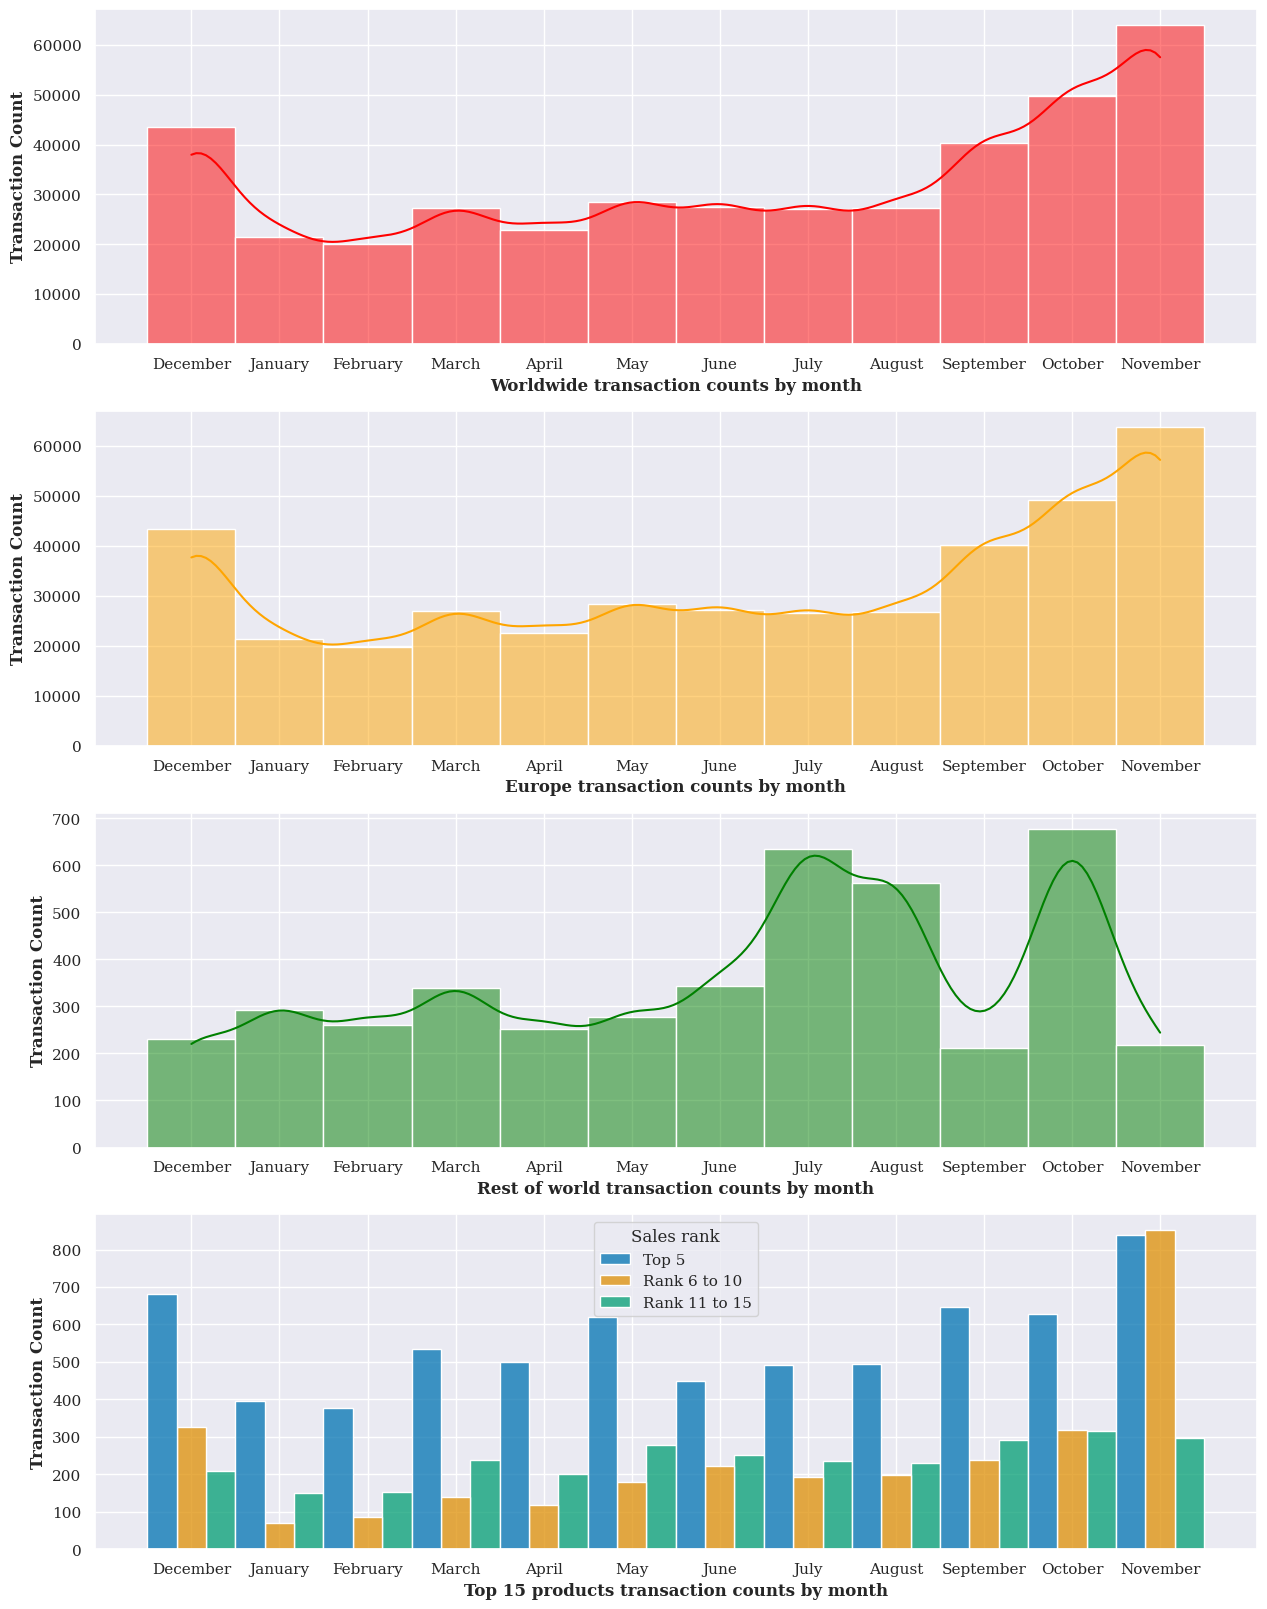

<Figure size 1500x400 with 0 Axes>

In [74]:
sns.set(style='darkgrid', palette='colorblind', font='serif', font_scale=1)

# after data processing is done, apply visualization to filtered dfs created to illustrate hypothesis
fig, axs = plt.subplots(4, 1, figsize=(15, 20))
plt.figure(figsize=(15, 4))

sns.histplot(df_hyp3['month'], kde=True, kde_kws={"bw_adjust":1.7}, ax=axs[0], color='red')
sns.histplot(df_euro['month'], kde=True, kde_kws={"bw_adjust":1.7}, ax=axs[1], color='orange')
sns.histplot(df_restofw['month'], kde=True, kde_kws={"bw_adjust":0.78}, ax=axs[2], color='green')
sns.histplot(x='month', data=df_rank1to15, hue='Sales rank', multiple='dodge', ax=axs[3], color='blue')

axs[0].set_xlabel("Worldwide transaction counts by month", weight='bold')
axs[1].set_xlabel("Europe transaction counts by month", weight='bold')
axs[2].set_xlabel("Rest of world transaction counts by month", weight='bold')
axs[3].set_xlabel("Top 15 products transaction counts by month", weight='bold')

for i in range(4):
    axs[i].set_ylabel('Transaction Count', weight='bold')

plt.show()

---

---

#### <u>Section 4: Conclusion</u>

*Overall summary of your work and final conclusions, recommendations*

Our conclusions for our work will assist us, a start-up e-commerce company in 2010-2011 time period greatly in product mix and Inventory availability (from hypothesis 1) and logistic and resource allocation (from hypothesis 2 and 3).

For inventory availability, and hypothesis 1 conclusion, we will focus our product mix to on the best sellers and low cost products since "Low ($0-5)" category contributes significantly more to the total revenue compared to other categories. 

For logistics and computing server allocation, in micro timescale of week, we will prepare for hot periods within the time of week identified (mid week, early morning to noon time) so as to fulfil our aspiration of being 'available' and 'instant' to our customers. 
For the macro timescale of months, we will stock up the best seller and low cost times (as identified to focus in hypothesis 1), during the anticipated peak months of september to december. So that we will not close sales to other competitors and increase customer satisfaction.

---